In [ ]:
#=using Pkg

Pkg.add("GLMNet")
Pkg.add("DecisionTree")
Pkg.add("NearestNeighbors")
Pkg.add("LIBSVM")
Pkg.add("MLBase")
Pkg.add("Distances")
Pkg.add("LinearAlgebra")
Pkg.add("DataStructures")=#

   Resolving package versions...
  No Changes to `C:\Users\write\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\write\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\write\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\write\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\write\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\write\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\write\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\write\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\write\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\write\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\write\.julia\environments\v1.11\Project.toml`
  No 

In [561]:
using CSV, DataFrames, Statistics, Random, Plots, StatsPlots, Combinatorics, GLM, GLMNet, DecisionTree, NearestNeighbors, LIBSVM
using MLBase, Distances, LinearAlgebra, DataStructures

In [562]:
include("eda.jl")

filterColumnsByCorrelation! (generic function with 1 method)

In [563]:
c=CSV.read("../dat/Smarket.csv",DataFrame)

ArgumentError: ArgumentError: "../dat/Smarket.csv" is not a valid file or doesn't exist

In [564]:
function roc_curve(gt,scores,model)
    th=[0.5*i for i in 1:20]
    values=roc([Int(x) for x in gt],scores[:,1])
    x=[r.fp/r.n for r in values]
    y=[r.tp/r.p for r in values]

    return plot(x,y,label=model,xlabel="TPR",ylabel="FPR")

end

function conf_mat(gt,pred)
   
    return confusmat(2,[Int(x)+1 for x in gt],[Int(x)+1 for x in pred])
end

conf_mat (generic function with 1 method)

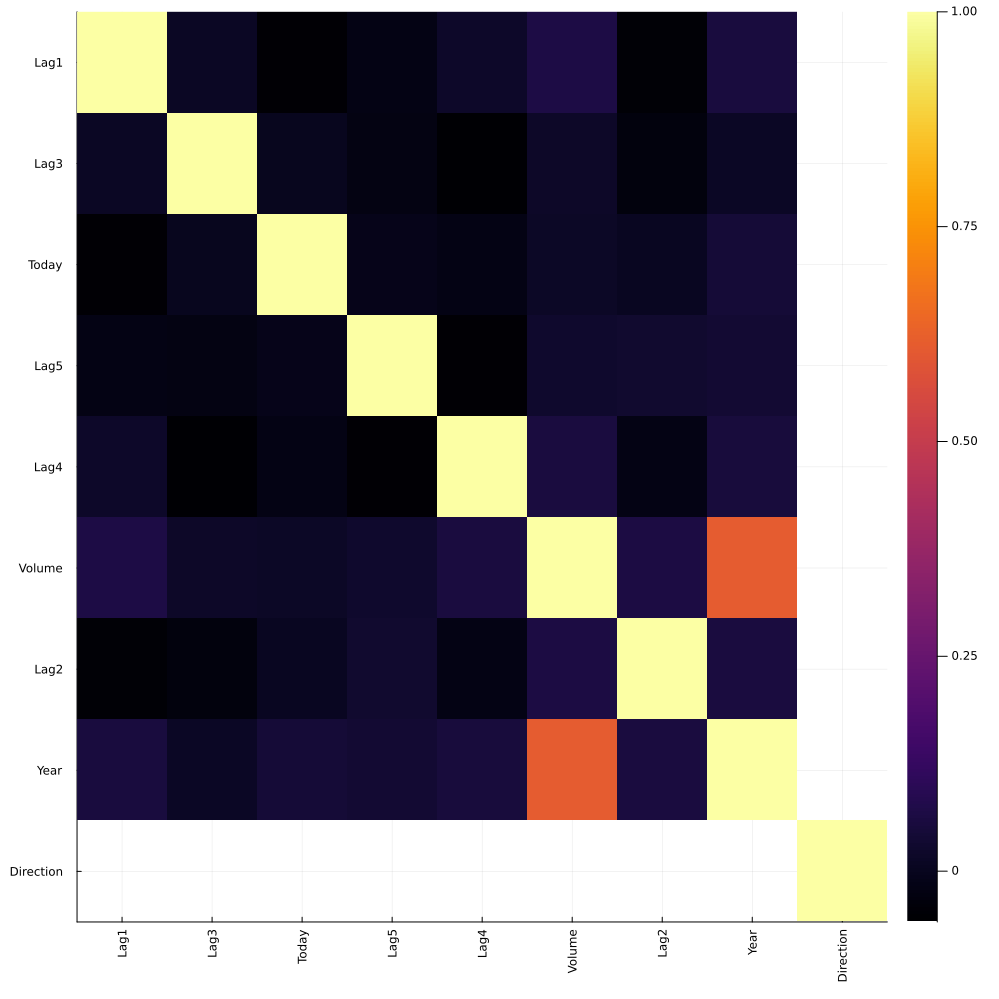

In [565]:
displayCorrelation(c)

In [566]:
deleteColumns!(c,20)

removeOutliersIQR!(c)

deleteRow!(c,"Direction")

(914, 9)
(909, 9)
(901, 9)
(896, 9)
(890, 9)
(880, 9)
(878, 9)
(878, 9)
(878, 9)


Row,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool
1,2001,-0.741944,1.19553,1.07326,0.415379,-0.263949,-0.56433,0.614,false
2,2001,0.736331,-0.755371,1.15755,1.09094,0.404575,-0.824974,0.213,false
3,2001,0.257116,0.702797,-0.753492,1.17626,1.07893,-0.293304,1.392,false
4,2001,1.66608,0.230101,0.674883,-0.758081,1.1641,0.0622561,-0.403,false
5,2001,-0.479034,1.6199,0.211844,0.687706,-0.766801,-0.0756669,0.027,false
6,2001,0.0348372,-0.496036,1.57325,0.219023,0.676418,-0.979582,1.303,false
7,2001,1.55972,0.0108452,-0.499456,1.59702,0.208568,-0.72524,0.287,false
8,2001,0.34555,1.51499,-0.00293138,-0.500948,1.58412,-0.441979,-0.498,false
9,2001,-0.592563,0.317332,1.47048,0.00162918,-0.510125,-0.631067,-0.189,false


In [567]:
findaccuracy(predicted,truth) = sum(predicted.==truth)/length(truth)

standarize(X) = (X .- mean(X)) ./ std(X)

standarize (generic function with 1 method)

In [568]:
predictors=filter(x->x ∉ ["Year","Today","Direction"],names(c))

for col in predictors
    c[!,col]=standarize(c[!,col])
end

c[!,"Direction"]=c[!,"Direction"].=="Up"


878-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [569]:

ratio=0.7

id=shuffle(1:nrow(c))
train_id=id[1:Int(round(nrow(c)*ratio))]
test_id=id[Int(round(nrow(c)*ratio)):nrow(c)]
x_train=c[train_id,predictors]
x_test=c[test_id,predictors]
y_train=c[train_id,"Direction"]
y_test=c[test_id,"Direction"]



264-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

# Lasso

In [570]:
path=glmnet(Matrix(x_train),y_train)
cv=glmnetcv(Matrix(x_train),y_train)

Least Squares GLMNet Cross Validation
100 models for 6 predictors in 10 folds
Best λ NaN (mean loss 0.000, std 0.000)

In [571]:
lambda = path.lambda[argmin(cv.meanloss)]

NaN

In [572]:
path=glmnet(Matrix(x_train),y_train,lambda=[lambda])

predictions_lasso=GLMNet.predict(path,Matrix(x_test))
predictions_lasso_cat=predictions_lasso.>=0.5

264×1 BitMatrix:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [573]:
findaccuracy(predictions_lasso_cat,y_test)

1.0

In [574]:
conf_mat(y_test,predictions_lasso_cat[:,1])

2×2 Matrix{Int64}:
 264  0
   0  0

In [575]:
roc_curve(y_test,predictions_lasso,"Lasso")

ArgumentError: ArgumentError: range step cannot be zero

# Ridge

In [576]:
path = glmnet(Matrix(x_train), y_train,alpha=0)
cv = glmnetcv(Matrix(x_train), y_train,alpha=0)

lambda = path.lambda[argmin(cv.meanloss)]

path = glmnet(Matrix(x_train), y_train,alpha=0,lambda=[lambda]);

predictions_ridge = GLMNet.predict(path,Matrix(x_test))

predictions_ridge_cat = predictions_ridge.>=0.5

findaccuracy(predictions_ridge_cat,y_test)

1.0

In [577]:

print(conf_mat(y_test,predictions_ridge_cat[:,1]))
roc_curve(y_test,predictions_ridge,"Ridge")

[264 0; 0 0]

ArgumentError: ArgumentError: range step cannot be zero

# Elastic Net

In [578]:
path = glmnet(Matrix(x_train), y_train,alpha=0.5)
cv = glmnetcv(Matrix(x_train), y_train,alpha=0.5)

lambda = path.lambda[argmin(cv.meanloss)]

path = glmnet(Matrix(x_train), y_train,alpha=0.5,lambda=[lambda]);

predictions_elastic = GLMNet.predict(path,Matrix(x_test))

predictions_elastic_cat = predictions_elastic.>=0.5

findaccuracy(predictions_elastic_cat,y_test)

1.0

In [579]:

print(conf_mat(y_test,predictions_elastic_cat[:,1]))
roc_curve(y_test,predictions_elastic,"ElasticNet")

[264 0; 0 0]

ArgumentError: ArgumentError: range step cannot be zero

# Decision Tree

In [580]:
model = DecisionTreeClassifier(max_depth=2)
DecisionTree.fit!(model, Matrix(x_train), y_train)

DecisionTreeClassifier
max_depth:                2
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  Bool[0]
root:                     Decision Tree
Leaves: 1
Depth:  0

In [581]:
predictions_DT = DecisionTree.predict(model, Matrix(x_test))
findaccuracy(predictions_DT,y_test)

1.0

In [582]:

print(conf_mat(y_test,predictions_DT[:,1]))
roc_curve(y_test,DecisionTree.predict_proba(model, Matrix(x_test)),"DecisionTree")

[264 0; 0 0]

ArgumentError: ArgumentError: range step cannot be zero

# Random Forest

In [583]:
model = RandomForestClassifier(n_trees=20)
DecisionTree.fit!(model, Matrix(x_train),y_train)

RandomForestClassifier
n_trees:             20
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             Bool[0]
ensemble:            Ensemble of Decision Trees
Trees:      20
Avg Leaves: 1.0
Avg Depth:  0.0

In [584]:

predictions_RF = DecisionTree.predict(model, Matrix(x_test))
findaccuracy(predictions_RF,y_test)

1.0

In [585]:

print(conf_mat(y_test,predictions_RF[:,1]))
roc_curve(y_test,DecisionTree.predict_proba(model, Matrix(x_test)),"RandomForest")

[264 0; 0 0]

ArgumentError: ArgumentError: range step cannot be zero

# Nearest Neighbors

In [586]:
kd_tree=KDTree(Matrix(x_train)')

KDTree{StaticArraysCore.SVector{6, Float64}, Euclidean, Float64, StaticArraysCore.SVector{6, Float64}}
  Number of points: 615
  Dimensions: 6
  Metric: Euclidean(0.0)
  Reordered: true

In [587]:
queries=Matrix(x_test)

264×6 Matrix{Float64}:
 -1.08104     1.01001    -0.822031    2.36069   -1.6325      2.03285
  0.479712    0.7159     -1.86629    -0.946385  -1.46077    -1.54012
 -1.43988     0.638186   -0.0297553  -1.01245    0.675645    2.37322
 -0.386688    0.687205   -0.73413     0.26569   -0.830294    1.8692
  2.40177     2.53678    -0.218448   -1.535     -1.01403    -0.648334
  0.960225   -0.136556    0.77424     0.15157    0.954255    1.26836
  0.498146    0.0308266  -0.332133    0.808661  -1.31306    -0.618835
 -0.397748   -0.926841   -0.117656    0.945605  -0.496441    2.135
  1.40387    -0.134165   -1.18652    -0.28569    0.36581     0.27106
  0.115947    0.197014    2.14431    -0.223224   0.148446    0.122051
  ⋮                                                          ⋮
  0.487085    1.04947    -0.152816    0.642887   0.544746    0.462049
  0.0729341   0.411024   -1.0998     -0.954794  -0.710203    2.08307
  1.12859    -0.11384    -0.925167   -1.31157   -0.0148773   1.32437
  0.581713   -0.

In [588]:
idxs, dists = knn(kd_tree, queries', 5, true)

([[615, 30, 156, 531, 292], [128, 541, 199, 381, 345], [444, 361, 387, 184, 554], [569, 349, 553, 78, 156], [415, 271, 417, 347, 340], [158, 100, 2, 23, 76], [465, 240, 235, 487, 493], [553, 591, 462, 383, 218], [362, 578, 501, 115, 71], [609, 256, 583, 526, 614]  …  [271, 541, 475, 51, 415], [267, 95, 66, 260, 192], [451, 262, 110, 349, 569], [437, 451, 530, 262, 214], [564, 196, 439, 42, 25], [583, 193, 577, 17, 464], [396, 38, 449, 548, 482], [339, 379, 441, 24, 498], [520, 174, 596, 453, 62], [483, 190, 569, 229, 239]], [[0.0, 2.2589766602737504, 2.332137550025657, 2.339099180535399, 2.5157849678357627], [1.0383265480370134, 1.5301048225705283, 1.7734885506738831, 1.7798017660117116, 1.7842705797000407], [1.1567851996614735, 1.2769635836997086, 1.565299085456713, 1.7653429362514217, 1.7691757972231605], [1.0022395696589674, 1.0476137963722603, 1.1735942506385144, 1.1770424979322922, 1.2211251349554073], [1.4346029152628643, 2.355272946274559, 2.3721511241089317, 2.430208200564823, 

In [589]:
function mycounter(array_of_elements)
    counts = Dict()

    for element in array_of_elements
        counts[element] = get(counts, element, 0) + 1
    end

    counts
end

mycounter (generic function with 1 method)

In [590]:
predictions_knn=[]
for p in idxs
    push!(predictions_knn,sum(y_train[p])/5)
end
predictions_knn_cat=predictions_knn.>=0.5

264-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [591]:
findaccuracy(predictions_knn_cat,y_test)

1.0

In [592]:
print(conf_mat(y_test,predictions_knn_cat[:,1]))
roc_curve(y_test,convert(Array{Float64,1},predictions_knn),"RandomForest")

[264 0; 0 0]

ArgumentError: ArgumentError: range step cannot be zero

# SVM

In [593]:
model = svmtrain(Matrix(x_train)', y_train)

LIBSVM.SVM{Bool, LIBSVM.Kernel.KERNEL}(SVC, LIBSVM.Kernel.RadialBasis, nothing, 6, 615, 1, Bool[0], Int32[1], Float64[], Int32[], LIBSVM.SupportVectors{BitVector, Matrix{Float64}}(0, Int32[0], Bool[], Matrix{Float64}(undef, 6, 0), Int32[], LIBSVM.SVMNode[]), 0.0, Matrix{Float64}(undef, 0, 0), Float64[], Float64[], Float64[], 3, 0.16666666666666666, 200.0, 0.001, 1.0, 0.5, 0.1, true, false)

In [594]:
predictions_SVM, decision_values = svmpredict(model, Matrix(x_test)')
findaccuracy(predictions_SVM,y_test)

1.0

In [595]:
print(conf_mat(y_test,predictions_SVM))
roc_curve(y_test,decision_values[1,:],"SVM")

[264 0; 0 0]

ArgumentError: ArgumentError: range step cannot be zero